In [1]:
%gui qt

import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import progressbar

import utoolbox.utils.files as fileutils
from utoolbox.container import Volume

# adjust plot size
plt.rcParams['figure.figsize'] = (24, 9)
# global progressbar util
bar = progressbar.ProgressBar()

### Step 1
Load files.

In [2]:
source_folder = fileutils.get_local_directory()
print(source_folder)
file_list = fileutils.list_files(source_folder, name_filters=[fileutils.ExtensionFilter('tif')])

/Users/Andy/Desktop/utoolbox/data/RFiSHp2aLFCYC/raw/488


### Step 2
Iterate over the volumes for statistics.

In [3]:
ts_avg = []
ts_std = []
for file_path in bar(file_list):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        data = Volume(file_path)
    avg, std = np.mean(data), np.std(data)
    ts_avg.append(avg)
    ts_std.append(std)

100% (10 of 10) |#########################| Elapsed Time: 0:00:05 Time: 0:00:05


### Step 3
Save the result and plot a preview.

In [4]:
df = pd.DataFrame({'Mean': ts_avg, 'SD': ts_std})
df.to_csv(os.path.join(source_folder, 'intensity_profile.csv'))

Text(0,0.5,'Average Intensity')

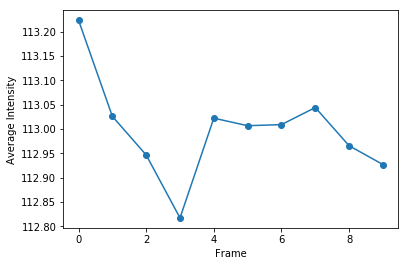

In [5]:
ts = np.arange(len(file_list))
plt.plot(ts, ts_avg, marker='o')
plt.xlabel('Frame')
plt.ylabel('Average Intensity')

In [6]:
from utoolbox.analysis.calcium import f_f0

result = f_f0(ts_avg,  (0, 3))

Text(0,0.5,'F/F0')

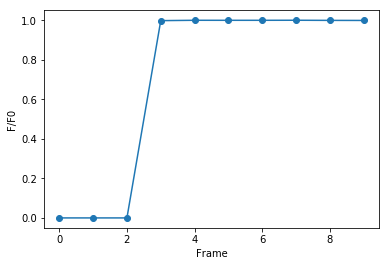

In [7]:
plt.plot(ts, result, marker='o')
plt.xlabel('Frame')
plt.ylabel('F/F0')